In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

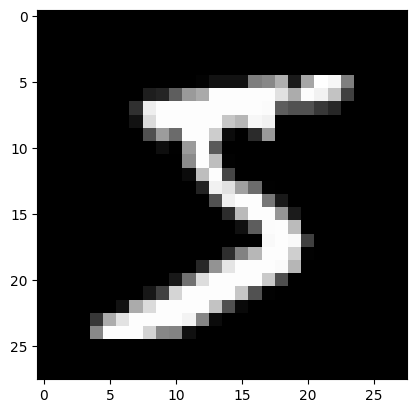

In [6]:
plt.imshow(single_image,cmap='gray')

In [7]:
y_train.shape

(60000,)

In [8]:
X_train.min()

0

In [9]:
X_train.max()

255

In [10]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [11]:
X_train_scaled.min()

0.0

In [12]:
X_train_scaled.max()

1.0

In [13]:
y_train[0]

5

In [14]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [15]:
type(y_train_onehot)

numpy.ndarray

In [16]:
y_train_onehot.shape

(60000, 10)

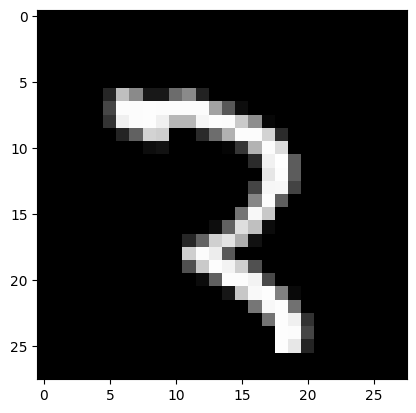

In [17]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [18]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [20]:
model = keras.Sequential()

model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),activation='relu'))
model.add(layers.Conv2D(filters=64,kernel_size=(5,5),strides=(1,1),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 17s 6ms/step - loss: 0.2072 - accuracy: 0.9384 - val_loss: 0.0696 - val_accuracy: 0.9808
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0612 - accuracy: 0.9819 - val_loss: 0.0630 - val_accuracy: 0.9823
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0398 - accuracy: 0.9877 - val_loss: 0.0447 - val_accuracy: 0.9872
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0439 - val_accuracy: 0.9872
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.0387 - val_accuracy: 0.9890


313/313 [==============================] - 1s 4ms/step
[[ 976    0    0    0    0    0    2    0    1    1]
 [   0 1126    0    0    0    0    4    1    4    0]
 [   3    1 1012    2    0    0    0   10    4    0]
 [   0    0    0 1000    0    2    0    3    5    0]
 [   1    0    1    0  972    0    1    1    3    3]
 [   1    1    0    6    0  881    2    0    0    1]
 [   3    1    0    0    1    2  948    0    3    0]
 [   0    3    0    0    0    0    0 1021    2    2]
 [   5    0    1    0    0    0    1    0  966    1]
 [   0    0    0    5    3    3    0    3    7  988]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99  

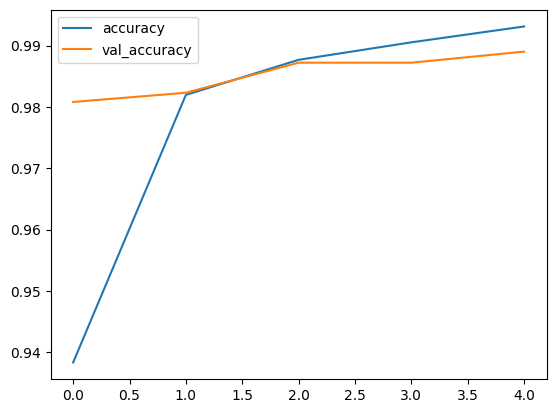

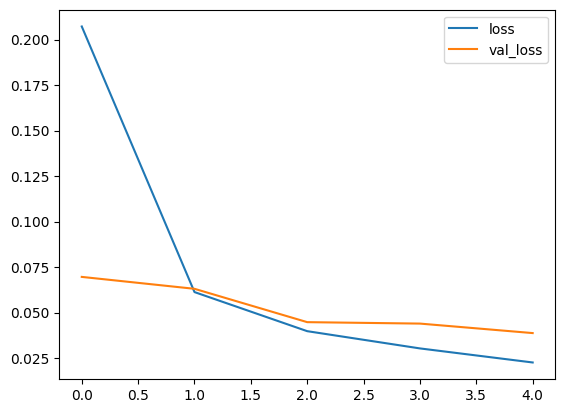

In [21]:
metrics = pd.DataFrame(model.history.history)
metrics.head()
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()

x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))

In [23]:
img = image.load_img('7.jpg')
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [24]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 86ms/step


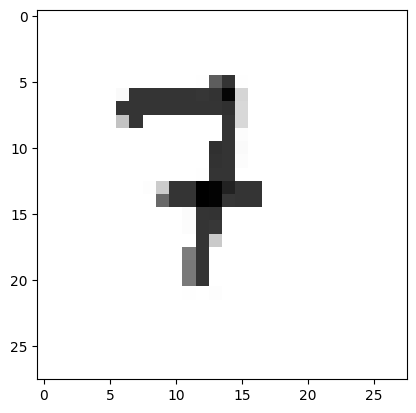

In [28]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [29]:
print(x_single_prediction)

[7]
